# <center><font color='Magenta' face='Cursive'> Image Segementation Using Clustering </font></center>

As you by now would have understood what are we trying to accomplish through this tutorial. We would be Segementing Images based on Clustering. 

But before we do that, try answering the below questions.


<font color='Red'> 1. What is Image Segemntation? </font><br>
<font color='Red'> 2. Why and Where Image Segemntation is used? </font><br>
<font color='Red'> 3. What is Clustering? </font><br>
<font color='Red'> 4. What are different types of clustering? </font>

<b>Please try to find out answers before going ahead in the notebook. You can find a basic idea of Image Segmentation [here](https://imageannotation.home.blog/2020/06/18/what-is-the-application-of-image-segmentation/) and Clustering [Here](https://www.geeksforgeeks.org/clustering-in-machine-learning/)</b>



<font color='Green' face='Cursive'> Now that you have got an idea of what image segmentation and where it is used. We will go ahead and do Image Segmentation using few of the basic clustering mechanisms available namely K-means and Hierarchial Clustering</font>

<font color='Blue' face='Comic sans MS'> We will be following the below Steps in the Notebook </font>
 - Load an Image
 - Preprocess the image
 - Apply clustering
  - We will be using Kmeans and hierarchial Clustering Techniques.
 - Visualize the Image after clustering

For performing any of the above we require a set of libraries which would help us in reading the Images, performing operations on Images including several basic functions such as loading, preprocessing and visualising.  Please go and try to find out what all libraries can be used. Here in we will be using only one out of various libraries available for Python

In [4]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

All the libraries are imported above. Few we will be encountering as we go ahead. Lets learn on the go. <br>
<font color='Brown'> Now, while finding out libraries as mentioned above did you come across matplotlib being able to read images. If you wondering is it? <br> Then, Yes, Matplotlib has [Image](https://matplotlib.org/stable/tutorials/introductory/images.html) package which helps us with the same. Not only that we can also see images by using matplotlib. You would have known that by now had you gone through the link above.Lets see that in action</font>                                                                              

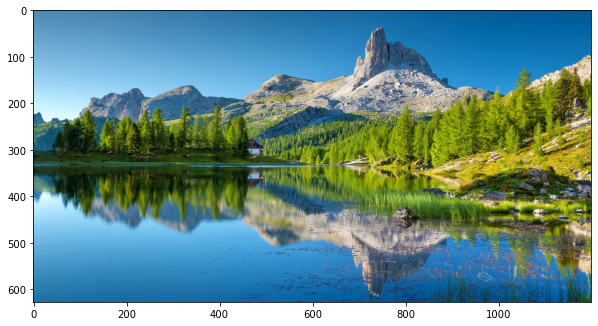

In [50]:
# Import matplotlib image
import matplotlib.image as img
# Import a random image
pic = img.imread("Image.jpeg");

# Check whether Image is loaded
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

The above image as i see is a very beautiful scenary, with a few colors say yelow, green, white, blue etc.

Lets check the shape of the image. Typically it should be three dimensional as it is a colour image having 4 channels say RGB and alph with different intensities to give colours to the image as the third dimension and values represnted are intensities of pixels. 

In [13]:
# Checck shape

pic.shape

(640, 1024, 4)

### Let's implement our first clustering techinque K-Means Clustering

Now we would be getting introduced one of the most powerful and most commonly used library when dealing with images [Opencv](https://opencv.org/)

<font color='Red' face='Comic Sans MS'> What is OpenCv? </font><br>
<font color='Green' face='Comic Sans MS'> OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. </font>

Steps to install Opencv : [Click Here](https://www.geeksforgeeks.org/set-opencv-anaconda-environment/)

In [14]:
import cv2

<font color='Green' face='Comic Sans Ms'>We can also read images with Opencv..... But there are differences when compared to image read using matplotlib. What is it??? 

I would leave that for you to figure out. Google it and find it </font>

<font color='Red' face='Comic Sans Ms'>Unable to find.. Ask your instructors in either doubt clarification sessions or during classes</font>

<font color='Blue' face='Cursive'>Methods of opencv that are used in this Notebook</font>

<font color='Brown'> 1. imread: </font> <font color='Green'> This method is used to read an image as a numpy array.It returns a 2D or 3D matrix based on the number of color channels present in the image. For a binary or grey scale image, 2D array is sufficient. But for a colored image, you need 3D array. </font>

<font color='Brown'> 1. cvtColor: </font> <font color='Green'> to convert an image from one color space to another. There are more than 150 color-space conversion methods available in OpenCV. For eg. Converting RGB Image to grayscale. </font>


In [72]:
# Read Image using cv2

pic = cv2.imread("Image.jpeg");

Below is one major difference reading image using matplotlib and Opencv. OpenCv reads images in BGR format where as matplotlib reads in RGB format

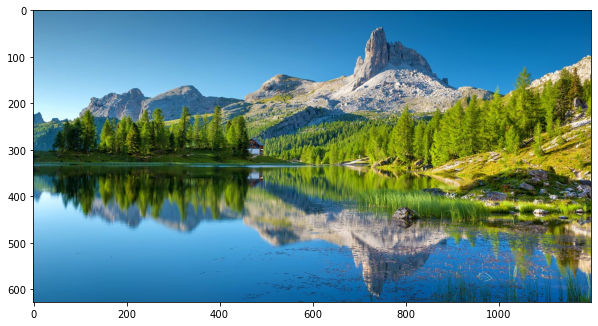

In [73]:
# Change color to RGB (from BGR)
plt.figure(figsize=(10,10))
image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

<font color='Red' face='comic sans ms'>Before we jump into solution, lets recap what K-Means Clustering actually is?</font>

<font color='Green' face='comic sans MS'> K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.<br><br> It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.</font>

<Font color='Red' face='Comic Sans MS'>Steps involved in Kmeans-Clustering:</font>
<font color='Green' face='comic sans MS'>
1. Choose the number of clusters you want to find which is k.
2. Randomly assign the data points to any of the k clusters.
3. Then calculate the center of the clusters.
4. Calculate the distance of the data points from the centers of each of the clusters.
5. Depending on the distance of each data point from the cluster, reassign the data points to the nearest clusters.
6. Again calculate the new cluster center.
7. Repeat steps 4,5 and 6 till data points don’t change the clusters, or till we reach the assigned number of iterations.</font>

<font color='Brown' face='Cursive'>Opencv has a very useful function which helps with [Kmeans Clustering](https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html) and this reduces the manual effort of writing all steps involved in K-Means Clustering.</font>

In [74]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

Also from the documentation it can be understood the input should be of type float32, So lets convert our image which is an array of pixels values to float

In [75]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals_fl = np.float32(pixel_vals)

Lets apply K-Means clustering for k=1-10 for better understanding of how image is being Segmanted

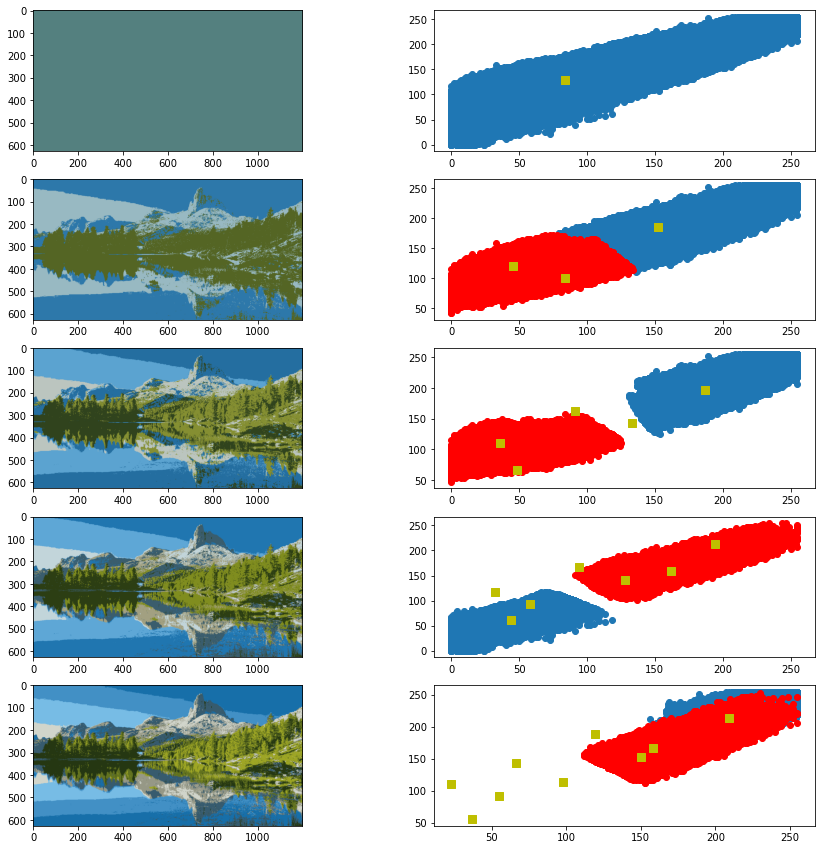

In [76]:
plt.figure(figsize=(15,15))
i=1
for k in range(1,10,2):
    retval, labels, centers = cv2.kmeans(pixel_vals_fl, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.subplot(5,2,i)
    plt.imshow(segmented_image)
    i = i+1
    # Now separate the data, Note the flatten()
    A = pixel_vals[labels.ravel()==0]
    B = pixel_vals[labels.ravel()==1]
    # Plot the data
    plt.subplot(5,2,i)
    plt.scatter(A[:,0],A[:,1])
    plt.scatter(B[:,0],B[:,1],c = 'r')
    plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'y', marker = 's')
    i = i+1

- As you can see above, the number of colors in segmented image increases with increasing K. This shows how an image is segmented based on clusters. Also you can see an approximate image being formed as we increase clusters. so if clusters are high enough we get exact Image

- Also you can see cluster centers increasing in the scatterplot

### Let's implement clustering techinque Hierarchial Clustering

<font color='Red' face='comic sans ms'>Lets recap what Hierarchial Clustering is, its Types and steps involved in it?</font>
<font color='Green' face='Comic Sans MS'>
The hierarchical clustering algorithm is an unsupervised Machine Learning technique. It aims at finding natural grouping based on the characteristics of the data.

The hierarchical clustering algorithm aims to find nested groups of the data by building the hierarchy. It is similar to the biological taxonomy of the plant or animal kingdom. Hierarchical clusters are generally represented using the hierarchical tree known as a dendrogram.</font>

<font color='Brown' face='Comic Sans MS'> Types and Implementation</font><br>
<font color='Green' face='Comic Sans MS'>
    <font color='Blue' face='Comic Sans MS'>1. Divisive:</font>
This is a top-down approach, where it initially considers the entire data as one group, and then iteratively splits the data into subgroups. If the number of a hierarchical clustering algorithm is known, then the process of division stops once the number of clusters is achieved. Else, the process stops when the data can be no more split, which means the subgroup obtained from the current iteration is the same as the one obtained from the previous iteration (one can also consider that the division stops when each data point is a cluster).<br><br>

 <font color='Blue' face='Comic Sans MS'>2. Agglomerative:</font>
It is a bottom-up approach that relies on the merging of clusters. Initially, the data is split into m singleton clusters (where the value of m is the number of samples/data points). Two clusters are merged into one iteratively thus reducing the number of clusters in every iteration. This process of merging clusters stops when all clusters have been merged into one or the number of desired clusters is achieved.</font>

Agglomerative is most commonly used and we will be implementing the same.For this we will need to use cluster packahe of sklearn which has [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class.

In [3]:
from sklearn.cluster import AgglomerativeClustering

Only one of distance_threshold and n_clusters should be given. Here i am creating an entire dendogram so using distance_threshold=0 and no clusters.

In [125]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0)

#### Resizing the image as high resolution images cannot be executed and a memory error will be thrown if system is unable to allocate enough memory

In [126]:
scale_percent = 5 # percent of original size
width = int(pic.shape[1] * scale_percent / 100)
height = int(pic.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(pic, dim, interpolation = cv2.INTER_AREA)
resized.shape

(31, 60, 3)

Now we can fit the model, but the shape of image should be less than 2 dimen so below operations are done

In [127]:
X = resized.flatten().reshape(-1,1)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

<font color='Brown'> We will plot a dendogram, but for that we will first device a function and then create a dendogram using scipy library's [dendogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

In [128]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plot a dendogram

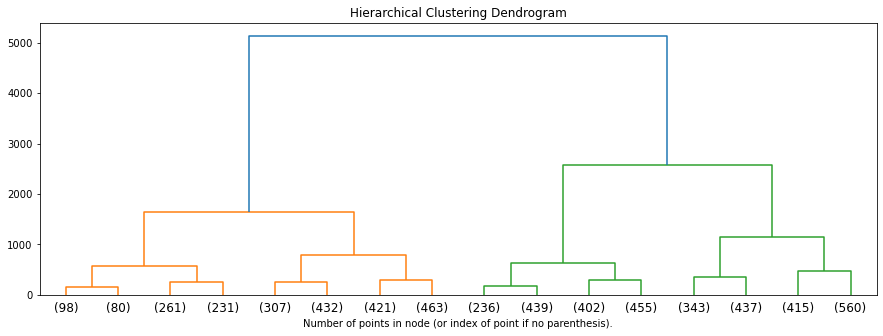

In [130]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Here Above, you can see a clear dendogram of Image that has been clustered using hierarchial clustering.